In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
df= pd.read_csv('train.csv')

In [360]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [362]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [363]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [364]:
round(df.groupby('Category').sum()[['Sales']])

,Sales
Category,
Furniture,728659.0
Office Supplies,705422.0
Technology,827456.0


#### We note that the category with the highest sales is technology.

In [365]:
round(df.groupby('Segment').sum()[['Sales']])

,Sales
Segment,
Consumer,1148061.0
Corporate,688494.0
Home Office,424982.0


#### And the segment with the highest sales volume is the consumer. 

In [366]:
# converting 'Sales' from float to int
df['Sales'] = df['Sales'].astype(int)

# displaying the datatypes
display(df.dtypes)


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales              int32
dtype: object

In [367]:
df['Region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [368]:
convert = {'Region':{'West':1,'East':2,'Central':3,'South':4}}

In [369]:
df= df.replace(convert)

<AxesSubplot:xlabel='Region', ylabel='count'>

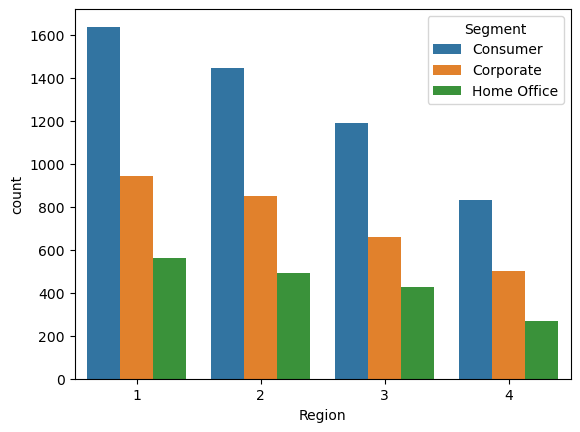

In [370]:
sns.countplot(data=df,x='Region', hue= 'Segment')

In [371]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [372]:
df['Region']=pd.to_numeric(df['Region'])

In [373]:
df.groupby('Region')[['Sales']].sum()

,Sales
Region,
1,708370
2,667854
3,491321
4,388205


In [374]:
total_sales= df[['Sales']].sum()

In [406]:
(708370/total_sales)*100

Sales    31.402859
dtype: float64

In [410]:
(667854/total_sales)*100

Sales    29.606738
dtype: float64

In [402]:
(491321/total_sales)*100

Sales    21.780827
dtype: float64

In [395]:
(388205/total_sales)*100

Sales    17.209576
dtype: float64

We note that the highest % of sales is in zone 1.

<AxesSubplot:xlabel='count', ylabel='Sub-Category'>

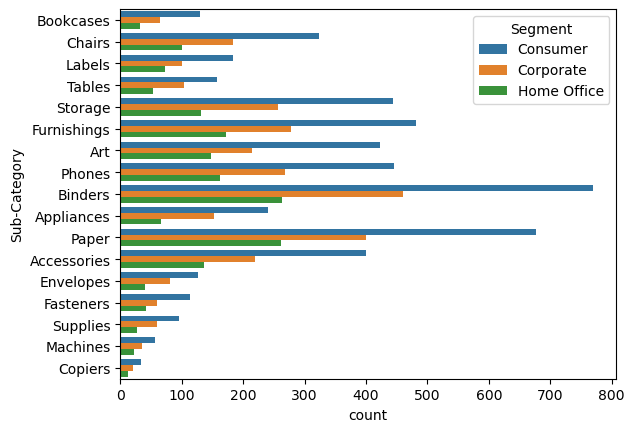

In [412]:
sns.countplot(data=df,y='Sub-Category', hue='Segment')

If we look at the sub-care the categories by segment, we see that the consumer customer has a greater interest in the following items are the Binders.

<AxesSubplot:xlabel='count', ylabel='Sub-Category'>

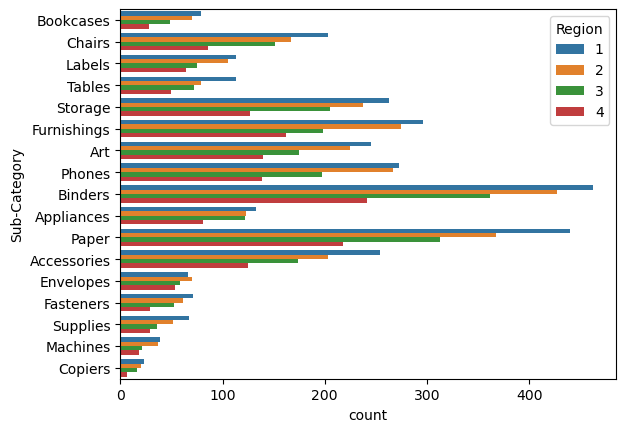

In [415]:
sns.countplot(data=df,y='Sub-Category', hue='Region')

These consumers are mainly located in regions 1 and 2.